## Frequency distributions

### Absolute Frequencies

Series.value_counts().sort_index(ascending = True)

### Relative Frequencies

Series.value_counts()/len(Series) or more effitiencly
Series.value_counts(normalize = True)

### Percentailes
Percentale rank of x is the pecent of values that are equal or below x.  Exmple, a percentaile rank of 19% means that 19% of values are equal or below x.

### Group Frequency Tables
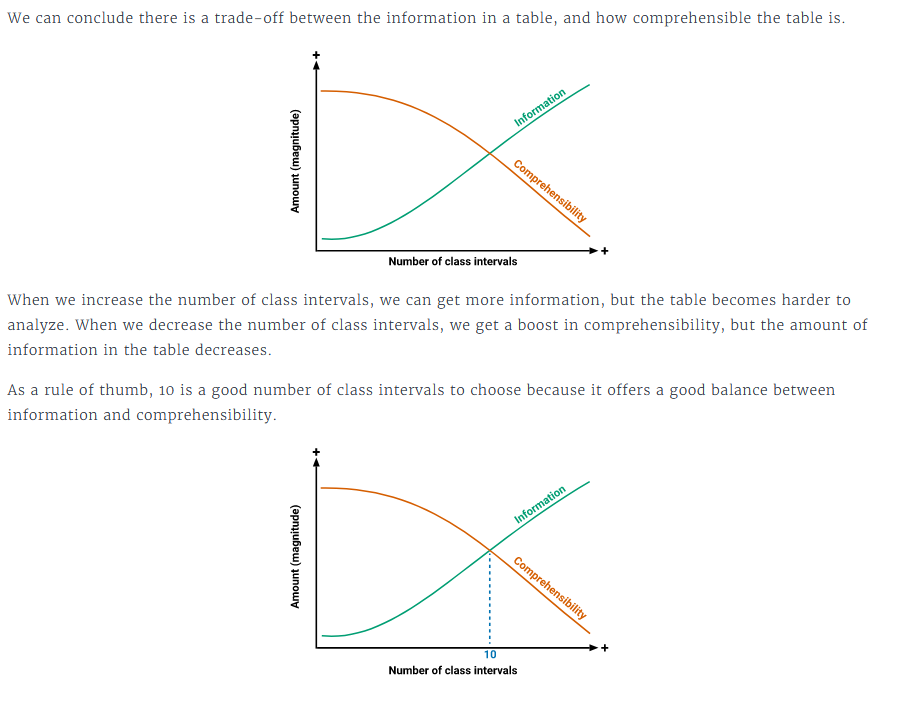

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
wnba = pd.read_csv("wnba.csv")

### Frequency 

In [125]:
wnba.Pos.value_counts()

G      60
F      33
C      25
G/F    13
F/C    12
Name: Pos, dtype: int64

In [126]:
# By default pandas sort the values in descending order. If we want to sort by Heights...
wnba.Height.value_counts().sort_index()

165     1
168     2
170     6
173    11
175    16
178     8
180     7
183    11
185    15
188    20
191    11
193    18
196     9
198     5
201     2
206     1
Name: Height, dtype: int64

In [127]:
wnba.Age.value_counts().sort_index(ascending = False)

36     1
35     4
34     5
33     3
32     8
31     8
30     9
29     8
28    14
27    13
26    12
25    15
24    16
23    15
22    10
21     2
Name: Age, dtype: int64

In [3]:
# PTS as ordinal scale function
def make_pts_ordinal(points):
    if points <= 20:
        return "very few points"
    if (20 < points <= 80):
        return "few points"
    if(80 < points <= 150):
        return "many, but below average"
    if (150 < points <= 300):
        return "average number of points"
    if (300 < points <= 450):
        return "more than average"
    if (points > 450):
        return "much more than average"

In [4]:
wnba["PTS_ordinal"] = wnba.PTS.apply(make_pts_ordinal)

In [5]:
wnba.PTS_ordinal.value_counts()

average number of points    45
few points                  27
many, but below average     25
more than average           21
much more than average      13
very few points             12
Name: PTS_ordinal, dtype: int64

### Realtive Frequencies

In [6]:
#Ages as proportions
wnba.Age.value_counts(normalize =1)*100

24    11.188811
25    10.489510
23    10.489510
28     9.790210
27     9.090909
26     8.391608
22     6.993007
30     6.293706
32     5.594406
31     5.594406
29     5.594406
34     3.496503
35     2.797203
33     2.097902
21     1.398601
36     0.699301
Name: Age, dtype: float64

### Grouping Frequency Distribution Table

In [7]:
wnba.Weight.value_counts(bins = 10)

(72.4, 78.2]      33
(78.2, 84.0]      31
(84.0, 89.8]      24
(60.8, 66.6]      21
(89.8, 95.6]      10
(66.6, 72.4]      10
(54.941, 60.8]     5
(107.2, 113.0]     3
(95.6, 101.4]      3
(101.4, 107.2]     2
Name: Weight, dtype: int64

In [8]:
wnba.PTS.value_counts(bins = 10)/len(wnba)*100

(1.417, 60.2]     20.979021
(60.2, 118.4]     16.783217
(176.6, 234.8]    13.986014
(234.8, 293.0]    11.888112
(118.4, 176.6]    11.888112
(351.2, 409.4]     6.993007
(409.4, 467.6]     5.594406
(293.0, 351.2]     5.594406
(525.8, 584.0]     3.496503
(467.6, 525.8]     2.797203
Name: PTS, dtype: float64

### Custom intervals
For more readable intervals

In [9]:
#Defining a custom interval
intervals = pd.interval_range(start =0,end = 600, freq = 100)
f_table = pd.Series([0,0,0,0,0,0], index = intervals)
f_table

(0, 100]      0
(100, 200]    0
(200, 300]    0
(300, 400]    0
(400, 500]    0
(500, 600]    0
dtype: int64

In [10]:
for each in wnba.PTS:
    for ival in intervals:
        if each in ival:
            f_table.loc[ival] += 1
            break        

In [11]:
f_table

(0, 100]      49
(100, 200]    28
(200, 300]    32
(300, 400]    17
(400, 500]    10
(500, 600]     7
dtype: int64

### Percentil Ranks

In [12]:
# What is the percentile rank of Age 23?
from scipy.stats import percentileofscore
percentileofscore(a = wnba.Age, score = 23, kind = "weak")

18.88111888111888

In [13]:
# What is the percentile rank of older than 23?
100-percentileofscore(a = wnba.Age, score = 23, kind = "weak")

81.11888111888112

In [14]:
# Using describe method
wnba.Age.describe().iloc[3:]

min    21.0
25%    24.0
50%    27.0
75%    30.0
max    36.0
Name: Age, dtype: float64

In [15]:
# Diferent percentiles
wnba.Age.describe(percentiles = [0.1, 0.15,0.30,.45,.60,.75,.95]).iloc[3:]

min    21.0
10%    23.0
15%    23.0
30%    24.6
45%    26.0
50%    27.0
60%    28.0
75%    30.0
95%    34.0
max    36.0
Name: Age, dtype: float64

In [16]:
# How many values on the height of 175cm
wnba.Height.value_counts()[175]

16

### Plots: 
Series.plot.bar()

Series.plot.pie()

Series.plot.hist()

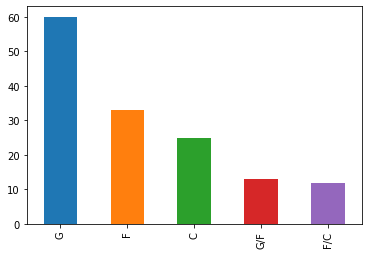

In [17]:
wnba.Pos.value_counts().plot.bar()
plt.show()

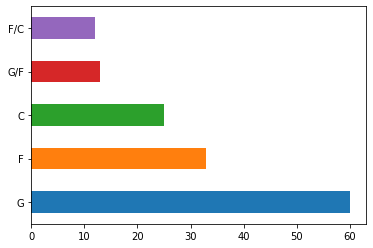

In [18]:
wnba.Pos.value_counts().plot.barh()
plt.show()

### Making a new colum to categorize Experience variable as ordinal
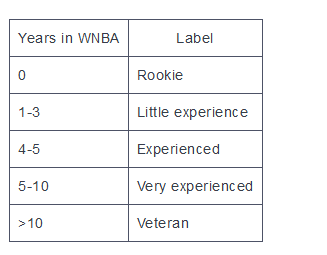

In [19]:
#R values to be replaced by one year
wnba.Experience = wnba.Experience.str.replace("R",str(0)).astype(int)

In [20]:
def exp_cat(row):
    if row < 1:
        return "Rookie"
    if 1<= row < 4:
        return "Little experience"
    if 4<= row < 5:
        return "Experienced"
    if 5<= row < 10:
        return "Very experienced"
    if 10<= row :
        return "Veteran"

In [21]:
wnba["Exp_ordinal"] = wnba.Experience.apply(exp_cat)

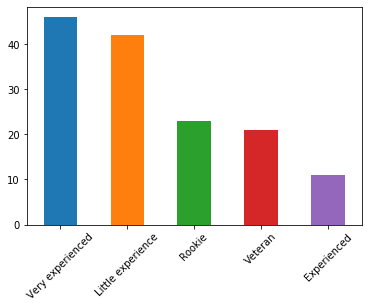

In [22]:
wnba.Exp_ordinal.value_counts().plot.bar(rot=45)
plt.show()

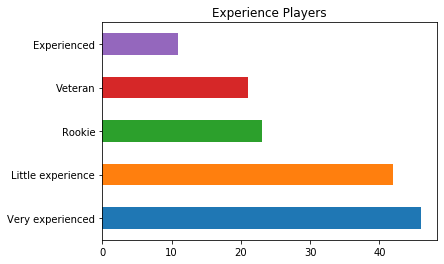

In [23]:
wnba.Exp_ordinal.value_counts().plot.barh(title = "Experience Players")
plt.show()

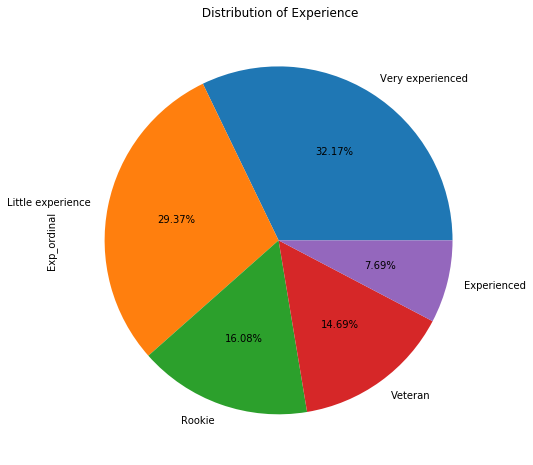

In [24]:
wnba.Exp_ordinal.value_counts().plot.pie(title = " Distribution of Experience", figsize = (8,8), autopct = "%.2f%%")
plt.show()

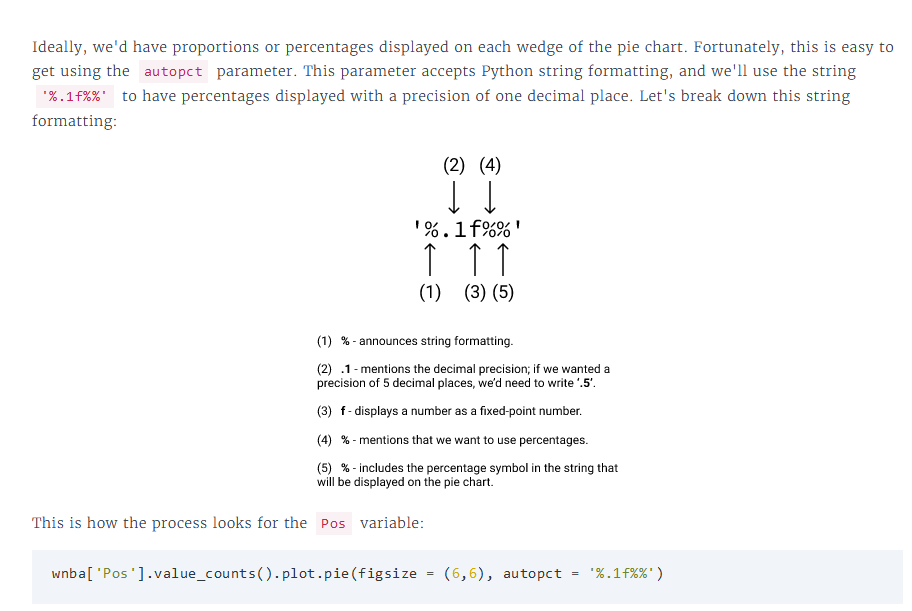

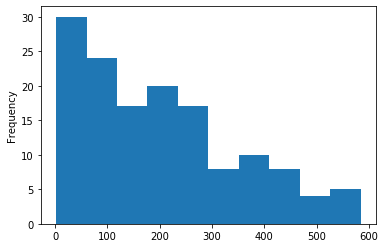

In [25]:
wnba.PTS.plot.hist()
plt.show()

In [26]:
wnba["Games Played"].describe()[3:]

min     2.0
25%    22.0
50%    27.0
75%    29.0
max    32.0
Name: Games Played, dtype: float64

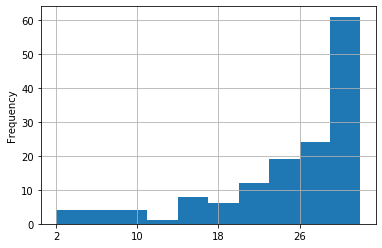

In [27]:
from numpy import arange
wnba["Games Played"].plot.hist(grid = True,xticks =arange(2,32,8))
plt.show()

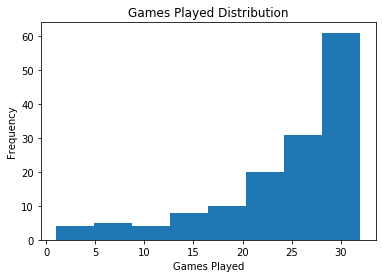

In [28]:
wnba["Games Played"].plot.hist(bins =8, range =(1,32), title ="Games Played Distribution")
plt.xlabel("Games Played")
plt.show()

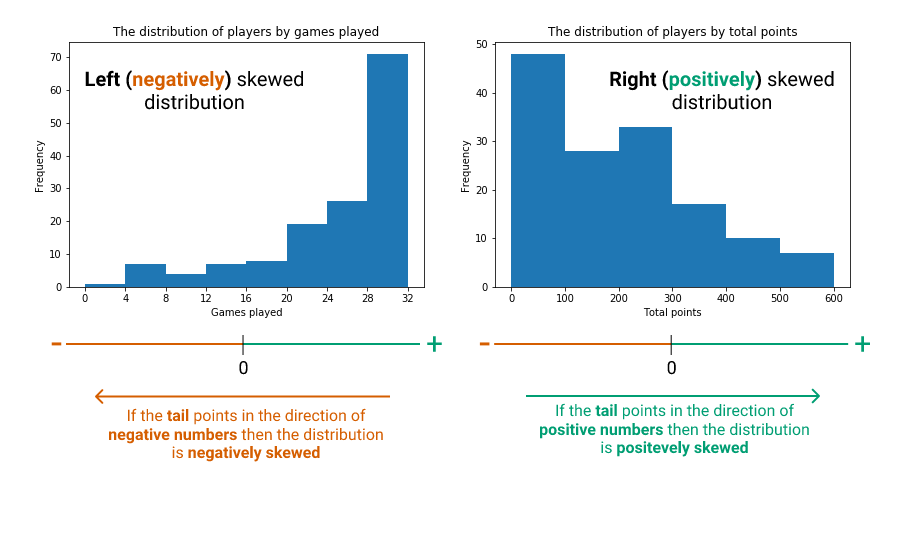

# Comparing Freq Distri. Seaborn module

In [38]:
Rookie = wnba[wnba.Exp_ordinal =="Rookie"]
Little_exp = wnba[wnba.Exp_ordinal =="Little experience"]
Experienced = wnba[wnba.Exp_ordinal =="Experienced"]
Very_exp = wnba[wnba.Exp_ordinal =="Very experienced"]
Veteran = wnba[wnba.Exp_ordinal =="Veteran"]

In [39]:
Rookie.Pos.value_counts()

G      14
F       4
C       4
F/C     1
Name: Pos, dtype: int64

In [40]:
Little_exp.Pos.value_counts()

G      14
F      13
C       8
F/C     4
G/F     3
Name: Pos, dtype: int64

In [41]:
Experienced.Pos.value_counts()

G    4
F    4
C    3
Name: Pos, dtype: int64

In [42]:
Very_exp.Pos.value_counts()

G      20
F       8
C       8
G/F     6
F/C     4
Name: Pos, dtype: int64

In [43]:
Veteran.Pos.value_counts()

G      8
F      4
G/F    4
F/C    3
C      2
Name: Pos, dtype: int64

In [44]:
import seaborn as sns

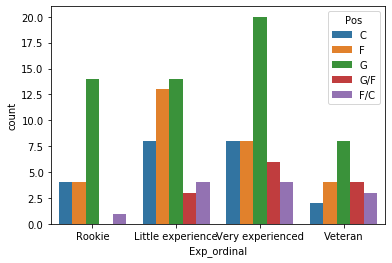

In [49]:
sns.countplot(x="Exp_ordinal",hue="Pos", data = wnba, order =["Rookie","Little experience","Very experienced","Veteran"], hue_order = ['C','F','G','G/F','F/C'])
plt.show()

### Creating ordinal variables to compare data

In [51]:
wnba['Age_rel'] = wnba.Age.apply(lambda x: "old" if x >= 27 else "young") 
wnba['min_rel'] = wnba.MIN.apply(lambda x: "average or above" if x >= 497 else "below average") 

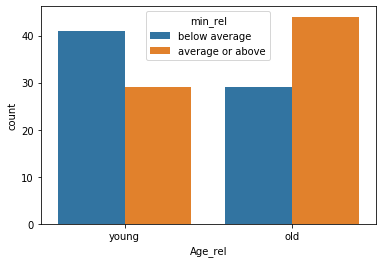

In [53]:
#The hypothesis is that youngs play more (time) than old
sns.countplot(x ='Age_rel', hue = 'min_rel', data = wnba)
plt.show()

In previous diagram, we see that young players playes less than the average than old people, the time of old people are above average. But we cannot see how much as we are doing it with ordinal variables

### Doing it with distributions

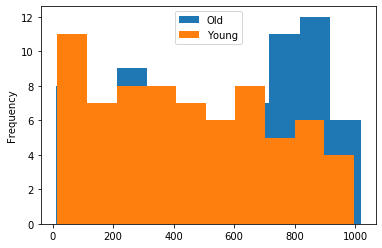

In [55]:
wnba[wnba.Age >= 27].MIN.plot.hist(label = 'Old', legend = True)
wnba[wnba.Age < 27].MIN.plot.hist(label = 'Young', legend = True)
plt.show()

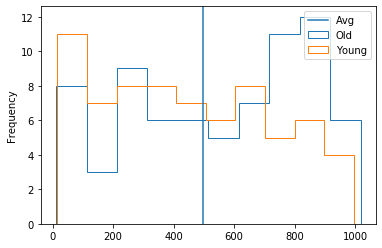

In [60]:
wnba[wnba.Age >= 27].MIN.plot.hist(histtype = 'step',label = 'Old', legend = True)
wnba[wnba.Age < 27].MIN.plot.hist(histtype = 'step',label = 'Young', legend = True)
plt.axvline(497, label = 'Avg')
plt.legend()
plt.show()

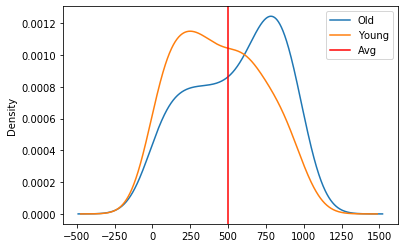

In [63]:
wnba[wnba.Age >= 27].MIN.plot.kde(label = 'Old', legend = True)
wnba[wnba.Age < 27].MIN.plot.kde(label = 'Young', legend = True)
plt.axvline(497, label = 'Avg', color = 'red')
plt.legend()
plt.show()

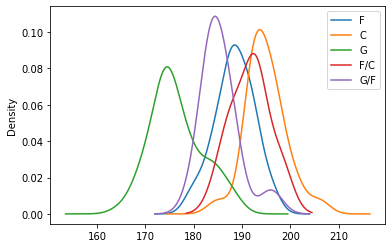

In [65]:
wnba[wnba.Pos == 'F'].Height.plot.kde(label = 'F', legend = True)
wnba[wnba.Pos == 'C'].Height.plot.kde(label = 'C', legend = True)
wnba[wnba.Pos == 'G'].Height.plot.kde(label = 'G', legend = True)
wnba[wnba.Pos == 'F/C'].Height.plot.kde(label = 'F/C', legend = True)
wnba[wnba.Pos == 'G/F'].Height.plot.kde(label = 'G/F', legend = True)
plt.show()

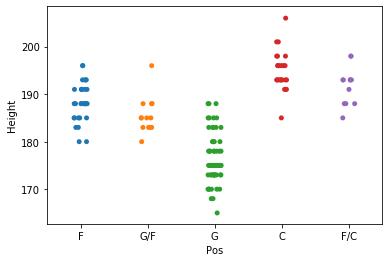

In [67]:
sns.stripplot(x = 'Pos', y = 'Height', data = wnba, jitter = True)
plt.show()

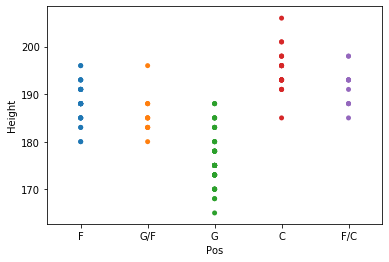

In [68]:
sns.stripplot(x = 'Pos', y = 'Height', data = wnba)
plt.show()

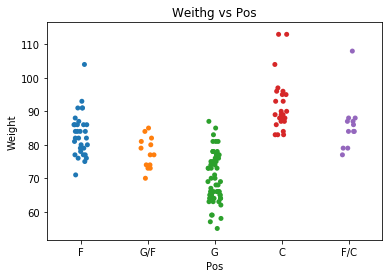

In [71]:
sns.stripplot(x = 'Pos', y='Weight', data = wnba, jitter = True)
plt.title('Weithg vs Pos')
plt.show()

### Box Plots
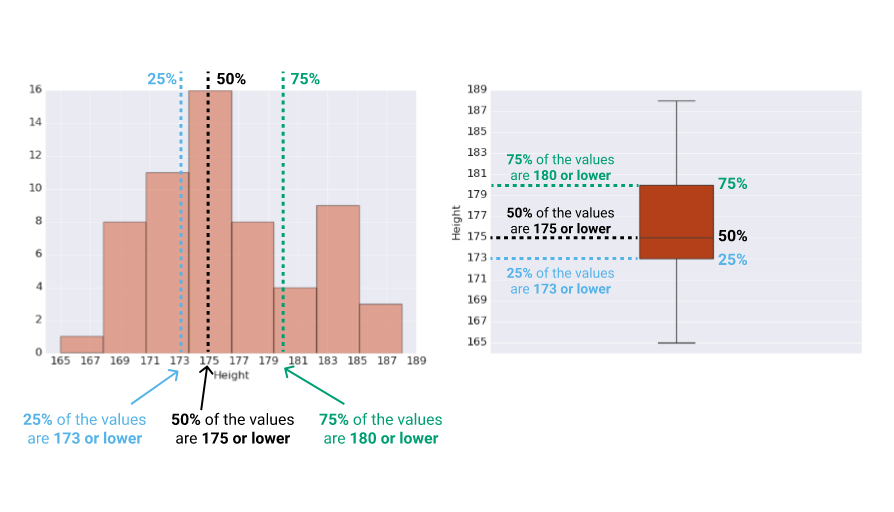

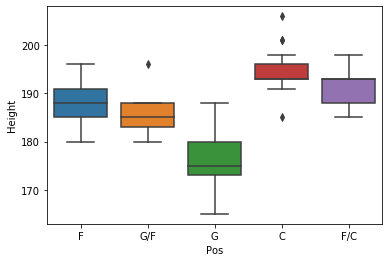

In [74]:
sns.boxplot(x='Pos', y = 'Height', data = wnba)
plt.show()

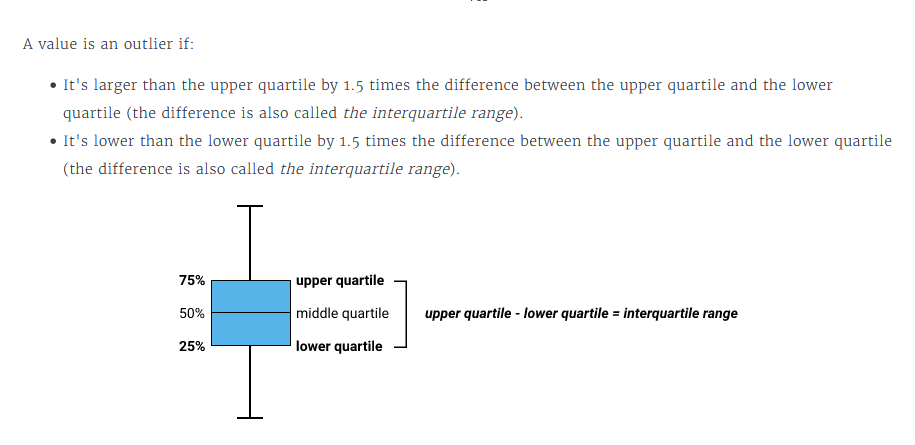

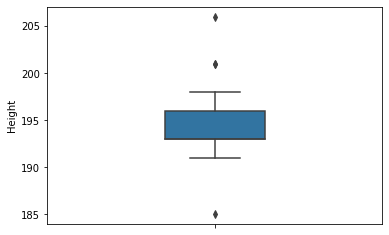

In [82]:
sns.boxplot(x=wnba[wnba.Pos == 'C'].Height, orient = 'vertical', width = .3)
plt.show()

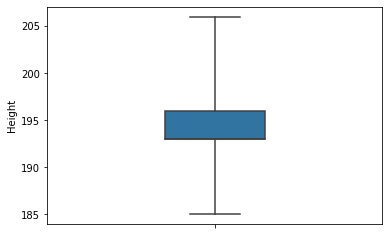

In [84]:
sns.boxplot(x=wnba[wnba.Pos == 'C'].Height, orient = 'vertical', width = .3, whis = 4)
plt.show()